In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Total number of customers: 58


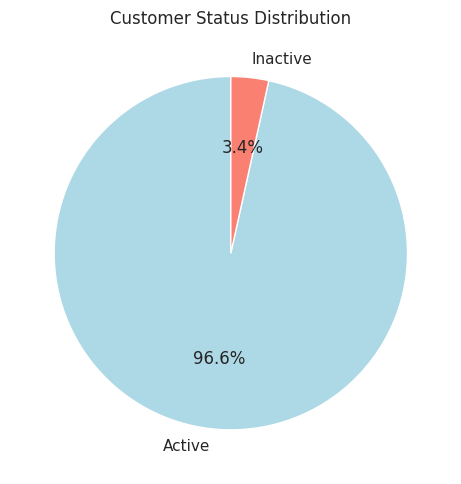

/tmp/ipython-input-4239913860.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=paper_counts.index, y=paper_counts.values, palette="Blues_d")


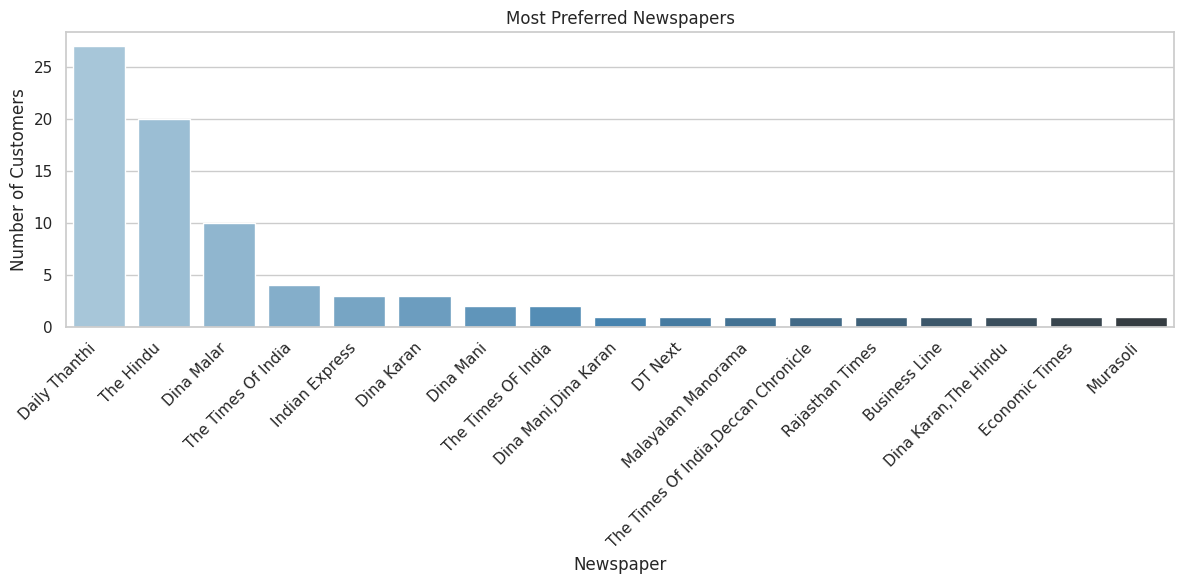

/tmp/ipython-input-4239913860.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=customer_df, x='Area_Zone', order=customer_df['Area_Zone'].value_counts().index, palette="Set2")


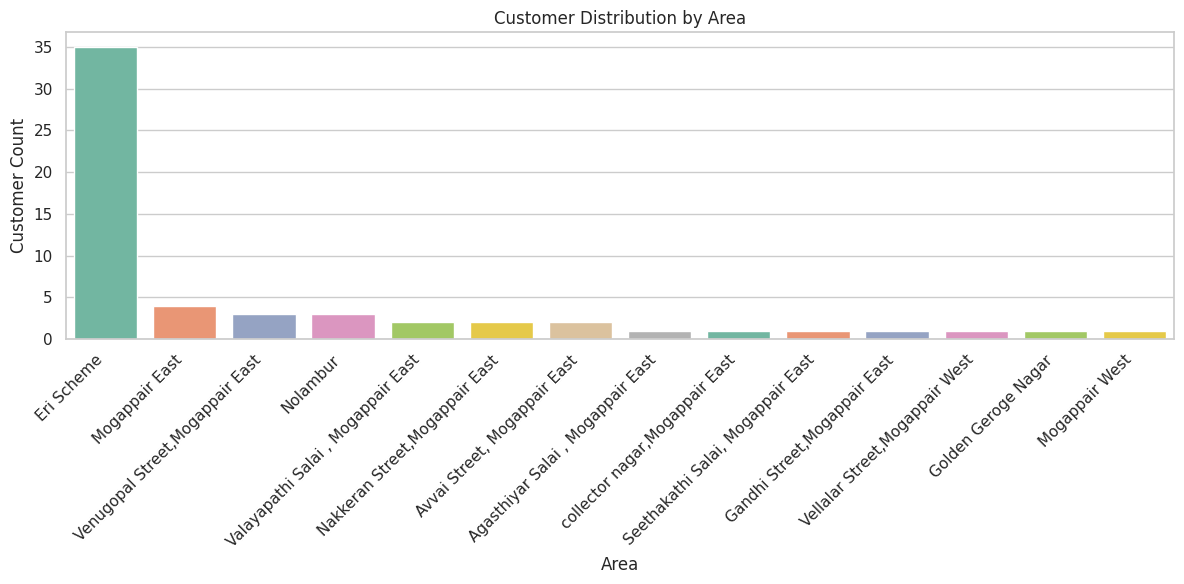

Total delivery records: 5336
Delivery success rate (%):
 Delivered?
Yes    94.977511
No      5.022489
Name: proportion, dtype: float64


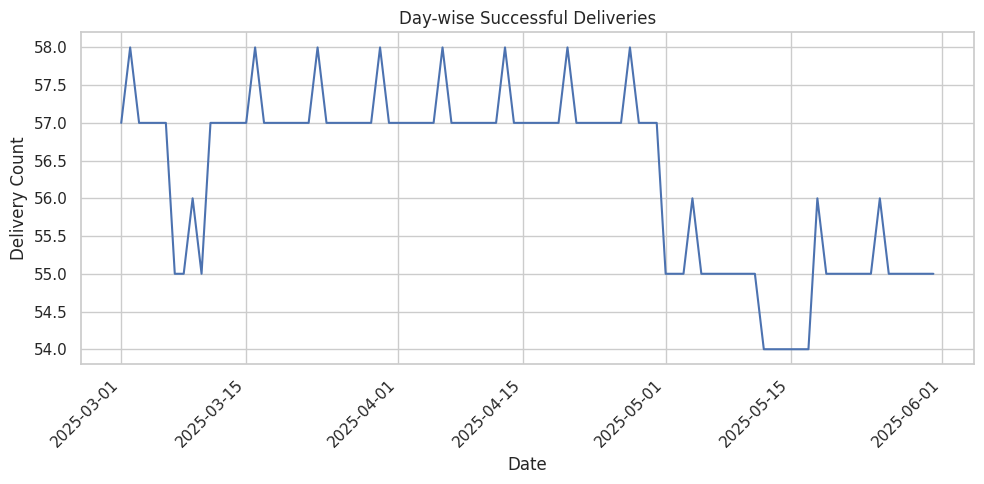

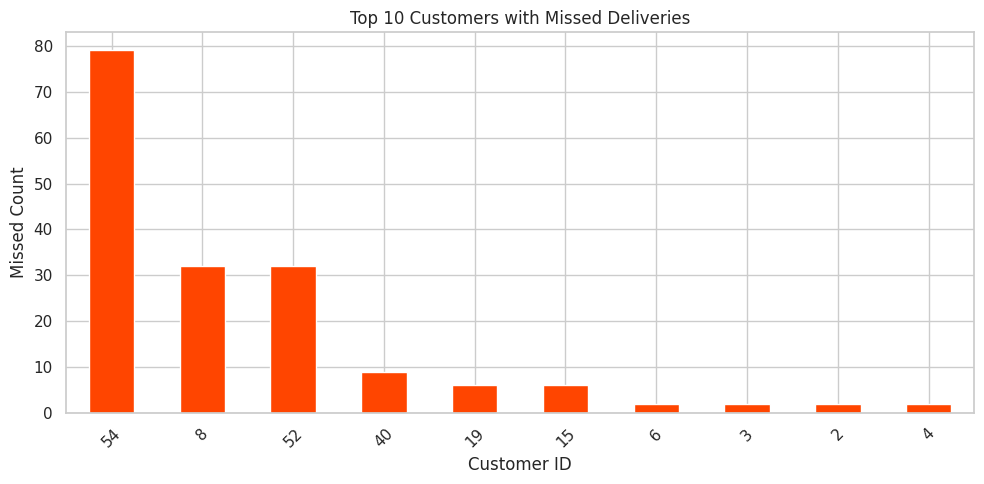

/tmp/ipython-input-4239913860.py:93: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_papers.index, y=top_papers.values, palette="Purples_d")


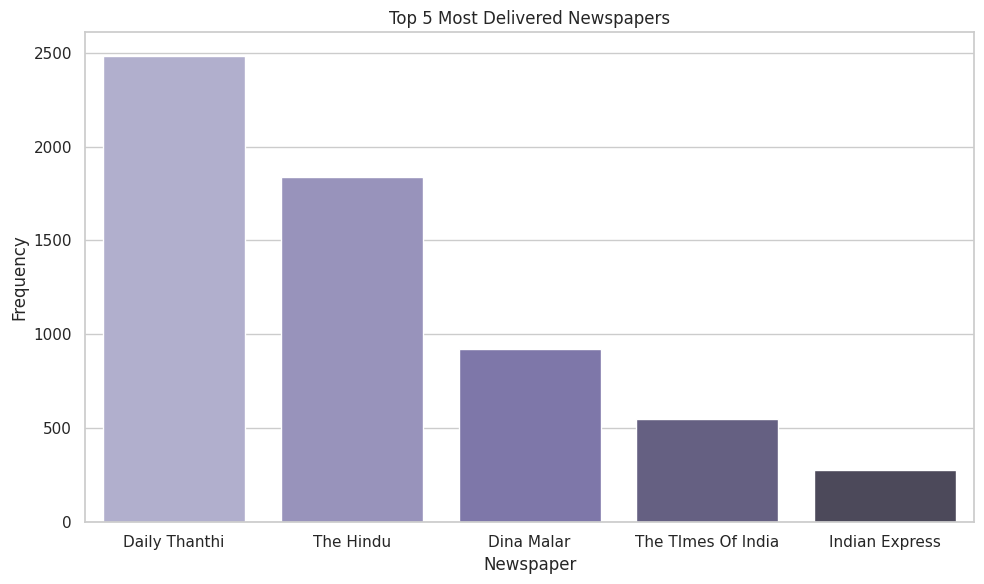


Total route distance covered: 1959.00 km
Total fuel used: 48.98 liters
Total fuel cost: ₹5093.40
Average customers served per day: 55.16


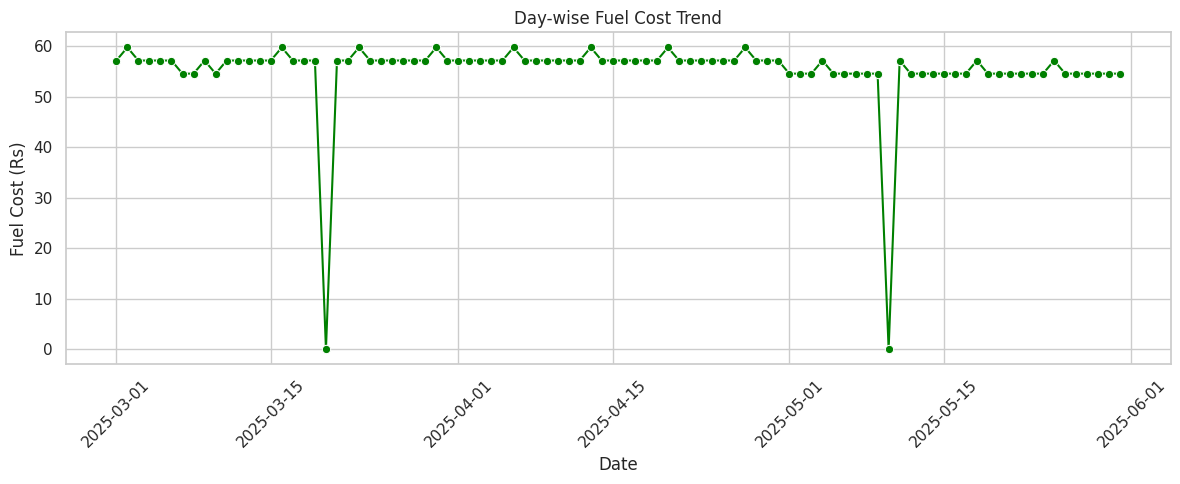

In [ ]:
# STEP 2: Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 5)

# STEP 3: Set path to your folder
base_path = "/content/drive/MyDrive/IITM-BDMproject/"

# Load datasets
customer_df = pd.read_excel(base_path + "Sheets.xlsx")
delivery_df = pd.read_excel(base_path + "Daily_Delivery_Template.xlsx")
fuel_df = pd.read_excel(base_path + "Route_and_Fuel_Log_Template.xlsx")

# --- CUSTOMER MASTER DATA ANALYSIS ---

# Total number of customers
print(f"Total number of customers: {customer_df.shape[0]}")

# Pie chart: Active vs Inactive
status_counts = customer_df['Status'].value_counts()
status_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=["lightblue", "salmon"])
plt.title("Customer Status Distribution")
plt.ylabel("")
plt.tight_layout()
plt.savefig("Customer_Status_Pie.png", dpi=300)
plt.show()

# Bar chart: Most preferred newspapers
newspapers = customer_df['Preferred_Newspapers'].dropna().str.split(', ')
flat_list = [item.strip() for sublist in newspapers for item in sublist]
paper_counts = pd.Series(flat_list).value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=paper_counts.index, y=paper_counts.values, palette="Blues_d")
plt.xticks(rotation=45, ha='right')
plt.title("Most Preferred Newspapers")
plt.xlabel("Newspaper")
plt.ylabel("Number of Customers")
plt.tight_layout()
plt.savefig("Most_Preferred_Newspapers.png", dpi=300)
plt.show()

# Area-wise customer distribution
plt.figure(figsize=(12, 6))
sns.countplot(data=customer_df, x='Area_Zone', order=customer_df['Area_Zone'].value_counts().index, palette="Set2")
plt.title("Customer Distribution by Area")
plt.xticks(rotation=45, ha='right')
plt.xlabel("Area")
plt.ylabel("Customer Count")
plt.tight_layout()
plt.savefig("Areawise_Customer_Distribution.png", dpi=300)
plt.show()

# --- DAILY DELIVERY LOG ANALYSIS ---

# Total delivery records
print(f"Total delivery records: {delivery_df.shape[0]}")

# Delivery success rate
success_rate = delivery_df['Delivered?'].value_counts(normalize=True) * 100
print("Delivery success rate (%):\n", success_rate)

# Convert Date column
delivery_df['Date'] = pd.to_datetime(delivery_df['Date'], dayfirst=True)

# Day-wise delivery volume (successful only)
daily_volume = delivery_df[delivery_df['Delivered?'] == 'Yes'].groupby('Date').size()
daily_volume.plot(title="Day-wise Successful Deliveries", ylabel="Delivery Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("Daily_Successful_Deliveries.png", dpi=300)
plt.show()

# Missed deliveries per customer
missed = delivery_df[delivery_df['Delivered?'] == 'No'].groupby('Customer_ID').size().sort_values(ascending=False)
missed.head(10).plot(kind='bar', color='orangered', title="Top 10 Customers with Missed Deliveries")
plt.ylabel("Missed Count")
plt.xlabel("Customer ID")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("Missed_Deliveries_Top10.png", dpi=300)
plt.show()

# Top 5 most delivered newspapers
papers = delivery_df['Newspaper_Delivered'].dropna().str.split(', ')
flat_papers = [p.strip() for sublist in papers for p in sublist]
top_papers = pd.Series(flat_papers).value_counts().head(5)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_papers.index, y=top_papers.values, palette="Purples_d")
plt.title("Top 5 Most Delivered Newspapers")
plt.ylabel("Frequency")
plt.xlabel("Newspaper")
plt.tight_layout()
plt.savefig("Top5_Delivered_Newspapers.png", dpi=300)
plt.show()

# --- ROUTE & FUEL LOG ANALYSIS ---

# Convert Date column
fuel_df['Date'] = pd.to_datetime(fuel_df['Date'], dayfirst=True)

# Totals
total_distance = fuel_df['Estimated_Route_Distance (km)'].sum()
total_fuel = fuel_df['Fuel_Used_Liters'].sum()
total_cost = fuel_df['Fuel_Cost (Rs)'].sum()
avg_customers = fuel_df['Total_Customers_Served'].mean()

print(f"\nTotal route distance covered: {total_distance:.2f} km")
print(f"Total fuel used: {total_fuel:.2f} liters")
print(f"Total fuel cost: ₹{total_cost:.2f}")
print(f"Average customers served per day: {avg_customers:.2f}")

# Line chart: Day-wise fuel cost
plt.figure(figsize=(12, 5))
sns.lineplot(data=fuel_df, x='Date', y='Fuel_Cost (Rs)', marker='o', color='green')
plt.title("Day-wise Fuel Cost Trend")
plt.xlabel("Date")
plt.ylabel("Fuel Cost (Rs)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("Fuel_Cost_Trend.png", dpi=300)
plt.show()


In [ ]:
customer_df.shape

(58, 12)

In [ ]:
delivery_df.shape

(5336, 6)

In [ ]:
fuel_df.shape

(92, 6)

In [ ]:
customer_df.describe(include='all').transpose()

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
Customer_ID,58.0,NaN,NaN,NaN,29.5,1.0,15.25,29.5,43.75,58.0,16.886879
Customer_Name,58.0,56.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Address,58,44,2nd Block,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Area_Zone,58,14,Eri Scheme,35,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Delivery_Days,58,2,Daily,57,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Start_Date,24.0,NaN,NaN,NaN,2000.0,1990.0,1995.75,2000.0,2000.0,2020.0,7.300983
End_Date,2,NaN,NaN,NaN,2025-05-01 00:00:00,2025-05-01 00:00:00,2025-05-01 00:00:00,2025-05-01 00:00:00,2025-05-01 00:00:00,2025-05-01 00:00:00,NaN
Status,58,2,Active,56,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Preferred_Newspapers,58,24,Daily Thanthi,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Magazines_Subscribed,4,3,Ananda Vikadan,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
delivery_df.describe(include='all').transpose()

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
Date,5336,NaN,NaN,NaN,2025-04-15 12:00:00,2025-03-01 00:00:00,2025-03-23 18:00:00,2025-04-15 12:00:00,2025-05-08 06:00:00,2025-05-31 00:00:00,NaN
Customer_ID,5336.0,NaN,NaN,NaN,29.5,1.0,15.0,29.5,44.0,58.0,16.742238
Newspaper_Delivered,5336,25,Daily Thanthi,1840,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Magazines_Delivered,5336,4,-,4968,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Delivered?,5336,2,Yes,5068,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Notes,611,7,Festival Delay,229,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
fuel_df.describe(include='all').transpose()

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
Date,92,NaN,NaN,NaN,2025-04-15 12:00:00,2025-03-01 00:00:00,2025-03-23 18:00:00,2025-04-15 12:00:00,2025-05-08 06:00:00,2025-05-31 00:00:00,NaN
Total_Customers_Served,92.0,NaN,NaN,NaN,55.163043,0.0,55.0,57.0,57.0,58.0,8.331428
Estimated_Route_Distance (km),92.0,NaN,NaN,NaN,21.293478,0.0,21.0,22.0,22.0,23.0,3.246428
Fuel_Used_Liters,92.0,NaN,NaN,NaN,0.532337,0.0,0.525,0.55,0.55,0.575,0.081161
Fuel_Cost (Rs),92.0,NaN,NaN,NaN,55.363043,0.0,54.6,57.2,57.2,59.8,8.440714
Delivery_Notes,2,1,Leave,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df = pd.read_excel(base_path + "Sheets.xlsx")

Route Mapping and Optimization

In [ ]:
!pip install folium openpyxl


In [ ]:
import pandas as pd
import folium


# Round lat/lon slightly to ensure grouping (optional)
df['Latitude'] = df['Latitude'].round(6)
df['Longitude'] = df['Longitude'].round(6)

# Group by unique lat/lon combinations
grouped = df.groupby(['Latitude', 'Longitude']).size().reset_index(name='Customer_Count')

# Create a clean tile map
map_center = [df['Latitude'].mean(), df['Longitude'].mean()]
delivery_map = folium.Map(location=map_center, zoom_start=13, tiles='CartoDB positron')

# Plot each unique location with count label using DivIcon
for _, row in grouped.iterrows():
    folium.map.Marker(
        [row['Latitude'], row['Longitude']],
        icon=folium.DivIcon(html=f"""
            <div style="font-size: 12px;
                        color: white;
                        background-color: orange;
                        border-radius: 50%;
                        width: 28px;
                        height: 28px;
                        text-align: center;
                        line-height: 28px;
                        font-weight: bold;
                        border: 2px solid white;">
                {int(row['Customer_Count'])}
            </div>""")
    ).add_to(delivery_map)

# Optional: Add reference location in green
folium.Marker(
    location=[13.087358153963766, 80.19761341085317],
    icon=folium.Icon(color='green', icon='info-sign'),
    popup="Paper Collecting point"
).add_to(delivery_map)

# Add second green marker labeled 'Destination' (text always visible)
folium.map.Marker(
    location=[13.086341499134202, 80.17408206734237],
    icon=folium.Icon(color='red', icon='info-sign'),
    popup="Destination (Mr.Kumar's Home)"
).add_to(delivery_map)


from folium import Element
title_html = """
     <div style="position: fixed; top: 10px; left: 50%; transform: translateX(-50%);
                 z-index: 9999; background-color: white; padding: 10px; border: 2px solid black;
                 border-radius: 8px; font-size: 16px; font-weight: bold;">
         Customer Delivery Locations with Counts
     </div>
"""

delivery_map.get_root().html.add_child(Element(title_html))

# Save map
delivery_map.save("Customer_Count_Map.html")
delivery_map



In [ ]:
from google.colab import files
files.download("Customer_Count_Map.html")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
pip install openrouteservice folium


In [ ]:
import pandas as pd
import folium
import openrouteservice
from openrouteservice import convert

# Initialize OpenRouteService client with API Key
ORS_API_KEY = 'eyJvcmciOiI1YjNjZTM1OTc4NTExMTAwMDFjZjYyNDgiLCJpZCI6IjY3YzBlYzZiOWI3YTQ2ZGY4YjBkOGE5ZWVkYmIxMTExIiwiaCI6Im11cm11cjY0In0='  # Replace with your API key
client = openrouteservice.Client(key=ORS_API_KEY)

# Source and Destination
source_point = (13.087358153963766, 80.19761341085317)
destination_point = (13.086341499134202, 80.17408206734237)

# Customer Coordinates (example - replace with your dataframe values)
customer_coords = customer_df[['Latitude', 'Longitude']].drop_duplicates().values.tolist()

# Full Route: Source -> Customers -> Destination
all_coords = [source_point] + customer_coords + [destination_point]

# Convert coordinates to (lon, lat) as ORS expects lon first
ors_coords = [(lon, lat) for lat, lon in all_coords]

# Request optimized route geometry from ORS (ROAD-BASED PATH)
route = client.directions(coordinates=ors_coords, profile='driving-car', optimize_waypoints=False, format='geojson')

# Plotting on Folium Map
route_map = folium.Map(location=source_point, zoom_start=13)

# Plot Markers
for idx, (lat, lon) in enumerate(all_coords):
    if idx == 0:
        folium.Marker([lat, lon], popup="Start (Source)", icon=folium.Icon(color='green')).add_to(route_map)
    elif idx == len(all_coords)-1:
        folium.Marker([lat, lon], popup="End (Destination)", icon=folium.Icon(color='red')).add_to(route_map)
    else:
        folium.Marker([lat, lon], popup=f"Stop {idx}", icon=folium.Icon(color='orange')).add_to(route_map)

# Add the route line (road-following)
folium.GeoJson(route, name="Route").add_to(route_map)

# Title on Map
from folium import Element
title_html = """
     <div style="position: fixed; top: 10px; left: 50%; transform: translateX(-50%);
                 z-index: 9999; background-color: white; padding: 10px; border: 2px solid black;
                 border-radius: 8px; font-size: 16px; font-weight: bold;">
         Optimized Newspaper Delivery Route (Road Path)
     </div>
"""
route_map.get_root().html.add_child(Element(title_html))

# Save and Display
route_map.save("Road_Following_TSP_Route_Map.html")
route_map


In [ ]:
from google.colab import files
files.download("Road_Following_TSP_Route_Map.html")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Extract total distance by summing over all segments
total_distance_meters = sum(segment['distance'] for segment in route['features'][0]['properties']['segments'])

# Convert to KM & Minutes
total_distance_km = total_distance_meters / 1000

# Fuel Consumption & Cost Calculation
mileage_kmpl = 40  # KM per Liter
fuel_used_liters = total_distance_km / mileage_kmpl
fuel_cost_per_liter = 104  # INR per liter
fuel_cost = fuel_used_liters * fuel_cost_per_liter

# Print Results
print(f"Total Distance Travelled (Road-based, All Segments): {total_distance_km:.2f} KM")
print(f"Total Fuel Used: {fuel_used_liters:.2f} Liters")
print(f"Total Fuel Cost: ₹{fuel_cost:.2f}")


Total Distance Travelled (Road-based, All Segments): 18.08 KM
Total Fuel Used: 0.45 Liters
Total Fuel Cost: ₹47.01


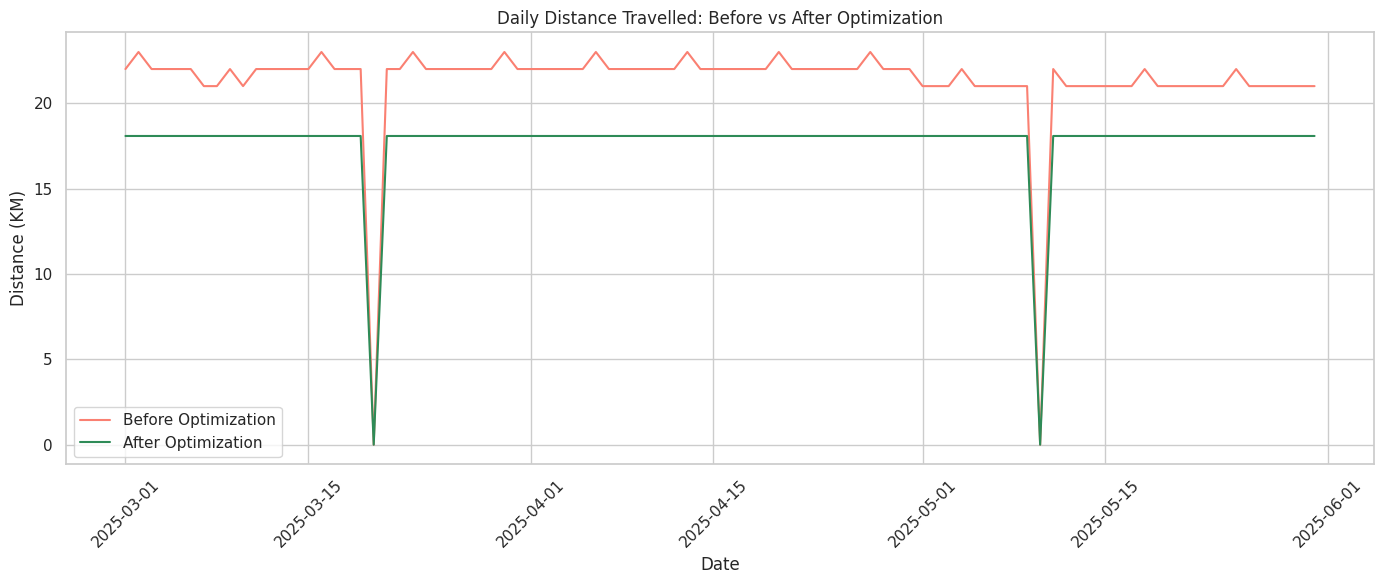

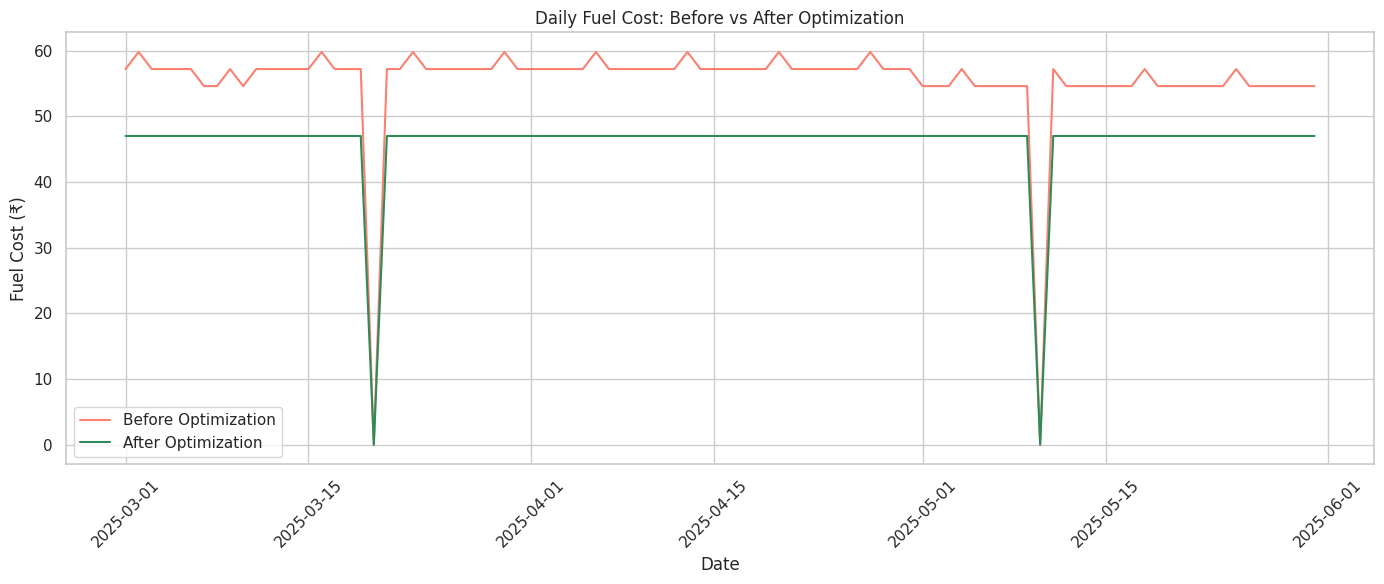

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load Fuel Log Sheet
fuel_log = fuel_df

# Ensure Date is in datetime format
fuel_log['Date'] = pd.to_datetime(fuel_log['Date'], dayfirst=True)

# Add Optimized Distance Column
optimized_distance_km = total_distance_km  # This is the route distance from ORS TSP
fuel_log['Optimized_Distance_KM'] = fuel_log['Estimated_Route_Distance (km)'].apply(lambda x: optimized_distance_km if x > 0 else 0)

# Calculate Fuel Used & Cost Before Optimization
mileage_kmpl = 40
fuel_cost_per_liter = 104

fuel_log['Before_Fuel_Used'] = fuel_log['Estimated_Route_Distance (km)'] / mileage_kmpl
fuel_log['Before_Fuel_Cost'] = fuel_log['Before_Fuel_Used'] * fuel_cost_per_liter

# Calculate Fuel Used & Cost After Optimization
fuel_log['After_Fuel_Used'] = fuel_log['Optimized_Distance_KM'] / mileage_kmpl
fuel_log['After_Fuel_Cost'] = fuel_log['After_Fuel_Used'] * fuel_cost_per_liter

# Plot Distance Comparison
plt.figure(figsize=(14,6))
plt.plot(fuel_log['Date'], fuel_log['Estimated_Route_Distance (km)'], label='Before Optimization', color='salmon')
plt.plot(fuel_log['Date'], fuel_log['Optimized_Distance_KM'], label='After Optimization', color='seagreen')
plt.xlabel('Date')
plt.ylabel('Distance (KM)')
plt.title('Daily Distance Travelled: Before vs After Optimization')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot Fuel Cost Comparison
plt.figure(figsize=(14,6))
plt.plot(fuel_log['Date'], fuel_log['Before_Fuel_Cost'], label='Before Optimization', color='salmon')
plt.plot(fuel_log['Date'], fuel_log['After_Fuel_Cost'], label='After Optimization', color='seagreen')
plt.xlabel('Date')
plt.ylabel('Fuel Cost (₹)')
plt.title('Daily Fuel Cost: Before vs After Optimization')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


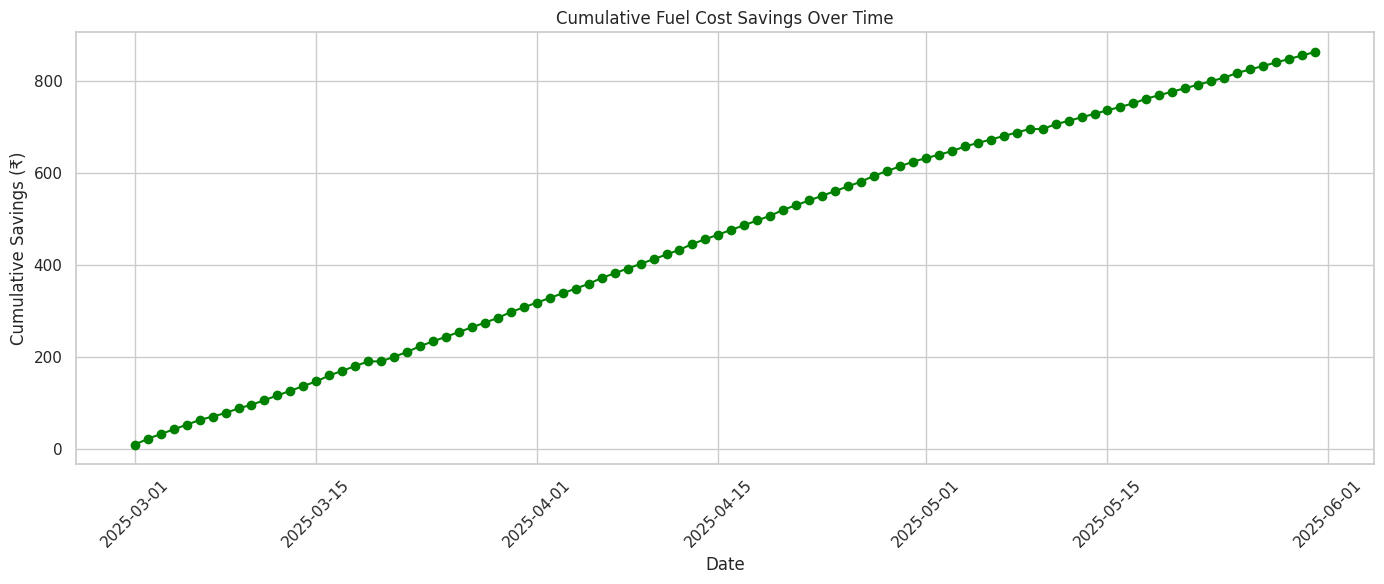

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load Route & Fuel Log Sheet (If not already loaded)

fuel_log['Date'] = pd.to_datetime(fuel_log['Date'], dayfirst=True)

# Optimized Distance (from ORS)
optimized_distance_km = total_distance_km  # ORS Optimized TSP Distance

# Apply Optimized Distance where applicable
fuel_log['Optimized_Distance_KM'] = fuel_log['Estimated_Route_Distance (km)'].apply(lambda x: optimized_distance_km if x > 0 else 0)

# Fuel Cost Calculations
mileage_kmpl = 40
fuel_cost_per_liter = 104

fuel_log['Before_Fuel_Used'] = fuel_log['Estimated_Route_Distance (km)'] / mileage_kmpl
fuel_log['Before_Fuel_Cost'] = fuel_log['Before_Fuel_Used'] * fuel_cost_per_liter

fuel_log['After_Fuel_Used'] = fuel_log['Optimized_Distance_KM'] / mileage_kmpl
fuel_log['After_Fuel_Cost'] = fuel_log['After_Fuel_Used'] * fuel_cost_per_liter

# Compute Daily Savings
fuel_log['Daily_Savings'] = fuel_log['Before_Fuel_Cost'] - fuel_log['After_Fuel_Cost']

# Compute Cumulative Savings over Time
fuel_log['Cumulative_Savings'] = fuel_log['Daily_Savings'].cumsum()

# Plotting Cumulative Savings Chart
plt.figure(figsize=(14,6))
plt.plot(fuel_log['Date'], fuel_log['Cumulative_Savings'], color='green', marker='o')
plt.title("Cumulative Fuel Cost Savings Over Time")
plt.xlabel("Date")
plt.ylabel("Cumulative Savings (₹)")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# STEP 1: Load Route and Fuel Log Data
# (Assuming fuel_log DataFrame is already loaded)

# STEP 2: Parse Dates Correctly
fuel_log['Date'] = pd.to_datetime(fuel_log['Date'], dayfirst=True, errors='coerce')

# STEP 3: Clean Data (Drop rows where essential values are missing)
fuel_log = fuel_log.dropna(subset=['Estimated_Route_Distance (km)', 'Fuel_Cost (Rs)'])

# STEP 4: Calculate Total Fuel Cost Before Optimization
total_cost_before = fuel_log['Fuel_Cost (Rs)'].sum()

# STEP 5: Determine Number of Delivery Loops (i.e., Days)
num_loops = fuel_log.shape[0]

# STEP 6: Calculate Average Cost per Loop (Before Optimization)
cost_per_loop_before = total_cost_before / num_loops

# STEP 7: Optimized Route Metrics
optimized_route_distance = 18.08  # KM (from optimized TSP route)
mileage_kmpl = 40  # Scooter Mileage (KM per Liter)
fuel_price_per_litre = 104  # Rs per litre

# STEP 8: Fuel used & cost for Optimized Route
fuel_used_optimized = optimized_route_distance / mileage_kmpl
fuel_cost_optimized = fuel_used_optimized * fuel_price_per_litre

# STEP 9: Calculate Savings
savings_per_loop = cost_per_loop_before - fuel_cost_optimized
total_cumulative_savings = savings_per_loop * num_loops

# STEP 10: Percentage Reduction
percent_reduction = (savings_per_loop / cost_per_loop_before) * 100

# STEP 11: Print Outputs
print(f"Average Fuel Cost per Loop (Before Optimization): ₹{cost_per_loop_before:.2f}")
print(f"Optimized Fuel Cost per Loop: ₹{fuel_cost_optimized:.2f}")
print(f"Per Loop Savings: ₹{savings_per_loop:.2f}")
print(f"Total Savings Over {num_loops} Days: ₹{total_cumulative_savings:.2f}")
print(f"Percentage Reduction in Fuel Cost per Loop: {percent_reduction:.2f}%")


Average Fuel Cost per Loop (Before Optimization): ₹55.36
Optimized Fuel Cost per Loop: ₹47.01
Per Loop Savings: ₹8.36
Total Savings Over 92 Days: ₹768.66
Percentage Reduction in Fuel Cost per Loop: 15.09%


TIME SERIES FORECASTING

In [ ]:
!pip install prophet


In [ ]:
customer_df = pd.read_excel(base_path + "Sheets.xlsx")
delivery_df = pd.read_excel(base_path + "Daily_Delivery_Template.xlsx")
fuel_df = pd.read_excel(base_path + "Route_and_Fuel_Log_Template.xlsx")

In [ ]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
import os

# Load and clean data
df = pd.read_excel(base_path + "Daily_Delivery_Template.xlsx")
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')
df = df.dropna(subset=['Date'])  # Drop invalid dates
df = df[df['Delivered?'] == 'Yes']
df['Newspaper_Delivered'] = df['Newspaper_Delivered'].fillna('')

# Clean newspaper names (strip, normalize case properly)
df = df.assign(Newspaper=df['Newspaper_Delivered'].str.split(','))
df = df.explode('Newspaper')
df['Newspaper'] = df['Newspaper'].str.strip().str.lower()   # normalize to lowercase
df = df[df['Newspaper'] != ""]                             # remove blanks

# Group by Date and Newspaper
daily_counts = df.groupby(['Date', 'Newspaper']).size().reset_index(name='Count')

# Output Folder
os.makedirs("forecast_pngs", exist_ok=True)

# Ensure unique list of newspapers
papers = daily_counts['Newspaper'].unique()

# Loop through each newspaper for forecasting
for paper in papers:
    print(f"Generating forecast for: {paper}")
    try:
        # Prepare Time Series Data
        paper_df = daily_counts[daily_counts['Newspaper'] == paper]
        ts = paper_df.set_index('Date').resample('D').sum().fillna(0).reset_index()
        prophet_df = ts.rename(columns={'Date': 'ds', 'Count': 'y'})

        # Skip if there’s insufficient data
        if prophet_df['y'].sum() == 0 or len(prophet_df) < 5:
            print(f"Skipping {paper} (insufficient data).")
            continue

        # Train Prophet Model
        model = Prophet(daily_seasonality=True, weekly_seasonality=True)
        model.fit(prophet_df)

        # Forecast Next 30 Days
        future = model.make_future_dataframe(periods=30)
        forecast = model.predict(future)

        # Plot Forecast
        fig = model.plot(forecast)
        plt.title(f"{paper.title()} - 30 Day Forecast")
        plt.xlabel("Date")
        plt.ylabel("Deliveries")

        # Save as PNG (safe filename)
        safe_paper = paper.replace(" ", "_").replace("/", "_")
        fig.savefig(f"forecast_pngs/{safe_paper}_forecast.png")
        plt.close(fig)

    except Exception as e:
        print(f"Skipping {paper}: {e}")


Generating forecast for: business line


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe_kig45j/lf98jhky.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe_kig45j/khhfy7y1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84246', 'data', 'file=/tmp/tmpe_kig45j/lf98jhky.json', 'init=/tmp/tmpe_kig45j/khhfy7y1.json', 'output', 'file=/tmp/tmpe_kig45j/prophet_models7tav2ew/prophet_model-20250817090951.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
09:09:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:09:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/

Generating forecast for: daily thanthi


09:09:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe_kig45j/emd5x6mb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe_kig45j/hvcz8gxo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21698', 'data', 'file=/tmp/tmpe_kig45j/emd5x6mb.json', 'init=/tmp/tmpe_kig45j/hvcz8gxo.json', 'output', 'file=/tmp/tmpe_kig45j/prophet_modelamqji7n1/prophet_model-20250817090952.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
09:09:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Generating forecast for: deccan chronicle


09:09:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe_kig45j/7zyvmwk3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe_kig45j/tr9c_l6y.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16657', 'data', 'file=/tmp/tmpe_kig45j/7zyvmwk3.json', 'init=/tmp/tmpe_kig45j/tr9c_l6y.json', 'output', 'file=/tmp/tmpe_kig45j/prophet_model4ah_18rn/prophet_model-20250817090953.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
09:09:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Generating forecast for: dina karan


09:09:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe_kig45j/y_s9yzof.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe_kig45j/w_e58_tp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13155', 'data', 'file=/tmp/tmpe_kig45j/y_s9yzof.json', 'init=/tmp/tmpe_kig45j/w_e58_tp.json', 'output', 'file=/tmp/tmpe_kig45j/prophet_model_kn4n7ab/prophet_model-20250817090954.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
09:09:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Generating forecast for: dina malar


09:09:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe_kig45j/jp2kt5sr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe_kig45j/on9r7z9b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90016', 'data', 'file=/tmp/tmpe_kig45j/jp2kt5sr.json', 'init=/tmp/tmpe_kig45j/on9r7z9b.json', 'output', 'file=/tmp/tmpe_kig45j/prophet_modelxzad40p9/prophet_model-20250817090955.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
09:09:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Generating forecast for: dina mani


09:09:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe_kig45j/u1t_7bof.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe_kig45j/9jmc2app.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42837', 'data', 'file=/tmp/tmpe_kig45j/u1t_7bof.json', 'init=/tmp/tmpe_kig45j/9jmc2app.json', 'output', 'file=/tmp/tmpe_kig45j/prophet_modelvq0o72y_/prophet_model-20250817090957.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
09:09:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Generating forecast for: dt next


09:09:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe_kig45j/xmamggw1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe_kig45j/nvqrp7zd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25649', 'data', 'file=/tmp/tmpe_kig45j/xmamggw1.json', 'init=/tmp/tmpe_kig45j/nvqrp7zd.json', 'output', 'file=/tmp/tmpe_kig45j/prophet_modelxueeq0nm/prophet_model-20250817090958.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
09:09:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Generating forecast for: economic times


09:09:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe_kig45j/zfrc9dd5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe_kig45j/5pt9peg7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52653', 'data', 'file=/tmp/tmpe_kig45j/zfrc9dd5.json', 'init=/tmp/tmpe_kig45j/5pt9peg7.json', 'output', 'file=/tmp/tmpe_kig45j/prophet_modelksma_tk8/prophet_model-20250817091000.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
09:10:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Generating forecast for: indian express


09:10:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe_kig45j/37nk6pa7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe_kig45j/fvdkloy_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27118', 'data', 'file=/tmp/tmpe_kig45j/37nk6pa7.json', 'init=/tmp/tmpe_kig45j/fvdkloy_.json', 'output', 'file=/tmp/tmpe_kig45j/prophet_model1dm5qrru/prophet_model-20250817091002.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
09:10:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Generating forecast for: malayalam manorama


09:10:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe_kig45j/jm58mjvi.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe_kig45j/fxsnydht.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96468', 'data', 'file=/tmp/tmpe_kig45j/jm58mjvi.json', 'init=/tmp/tmpe_kig45j/fxsnydht.json', 'output', 'file=/tmp/tmpe_kig45j/prophet_model4tycptnt/prophet_model-20250817091003.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
09:10:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Generating forecast for: murasoli


09:10:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe_kig45j/5m5io9_s.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe_kig45j/cgbv9vnh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59110', 'data', 'file=/tmp/tmpe_kig45j/5m5io9_s.json', 'init=/tmp/tmpe_kig45j/cgbv9vnh.json', 'output', 'file=/tmp/tmpe_kig45j/prophet_modelsaah52ww/prophet_model-20250817091004.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
09:10:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Generating forecast for: rajasthan times


09:10:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe_kig45j/7fp5p5op.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe_kig45j/2ju1ru05.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62', 'data', 'file=/tmp/tmpe_kig45j/7fp5p5op.json', 'init=/tmp/tmpe_kig45j/2ju1ru05.json', 'output', 'file=/tmp/tmpe_kig45j/prophet_modelylcibb3v/prophet_model-20250817091005.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
09:10:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Generating forecast for: the hindu


09:10:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe_kig45j/x3blduve.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe_kig45j/qu5c_bys.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29693', 'data', 'file=/tmp/tmpe_kig45j/x3blduve.json', 'init=/tmp/tmpe_kig45j/qu5c_bys.json', 'output', 'file=/tmp/tmpe_kig45j/prophet_model3dqwkgqs/prophet_model-20250817091007.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
09:10:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Generating forecast for: the times of india


09:10:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
import shutil
from google.colab import files

# Step 1: Zip the folder
shutil.make_archive("forecast_images", 'zip', "forecast_pngs")

# Step 2: Download the zip file
files.download("forecast_images.zip")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/tmp/ipython-input-4266342776.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daily_df['Day'] = daily_df['Date'].dt.day
/tmp/ipython-input-4266342776.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daily_df['Month'] = daily_df['Date'].dt.strftime('%b')  # 'Mar', 'Apr', 'May'


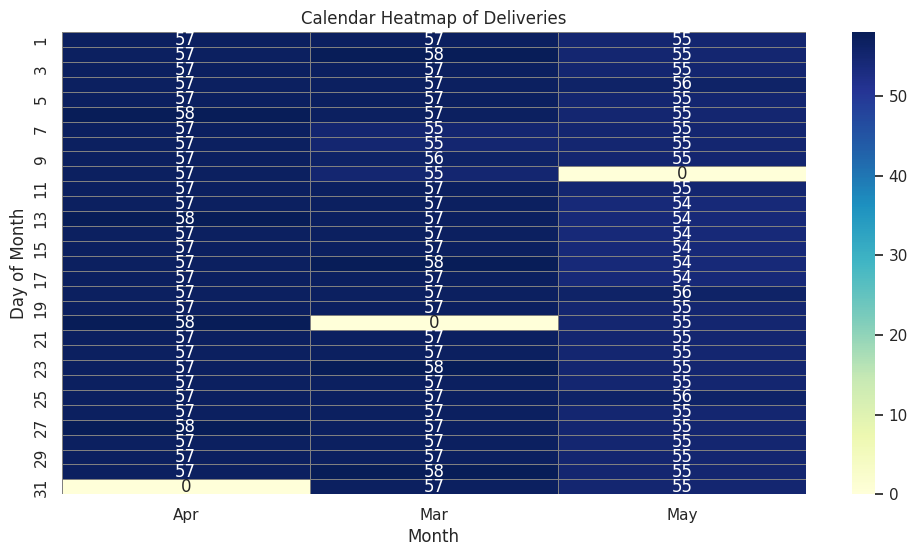

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert 'Date' column to datetime
delivery_df['Date'] = pd.to_datetime(delivery_df['Date'], dayfirst=True)

# Filter only successful deliveries
daily_df = delivery_df[delivery_df['Delivered?'] == 'Yes']

# Extract Day and Month columns
daily_df['Day'] = daily_df['Date'].dt.day
daily_df['Month'] = daily_df['Date'].dt.strftime('%b')  # 'Mar', 'Apr', 'May'

# Group by Day and Month to get Delivery Count
daily_counts = daily_df.groupby(['Day', 'Month']).size().reset_index(name='Delivery_Count')

# Pivot DataFrame for Heatmap (Day as index, Month as columns)
calendar_data = daily_counts.pivot(index='Day', columns='Month', values='Delivery_Count')

# Optional: Fill NaN with 0 (if some days have no deliveries)
calendar_data = calendar_data.fillna(0)

# Plot Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(calendar_data, cmap="YlGnBu", annot=True, fmt=".0f", linewidths=.5, linecolor='gray')
plt.title("Calendar Heatmap of Deliveries")
plt.xlabel("Month")
plt.ylabel("Day of Month")
plt.show()


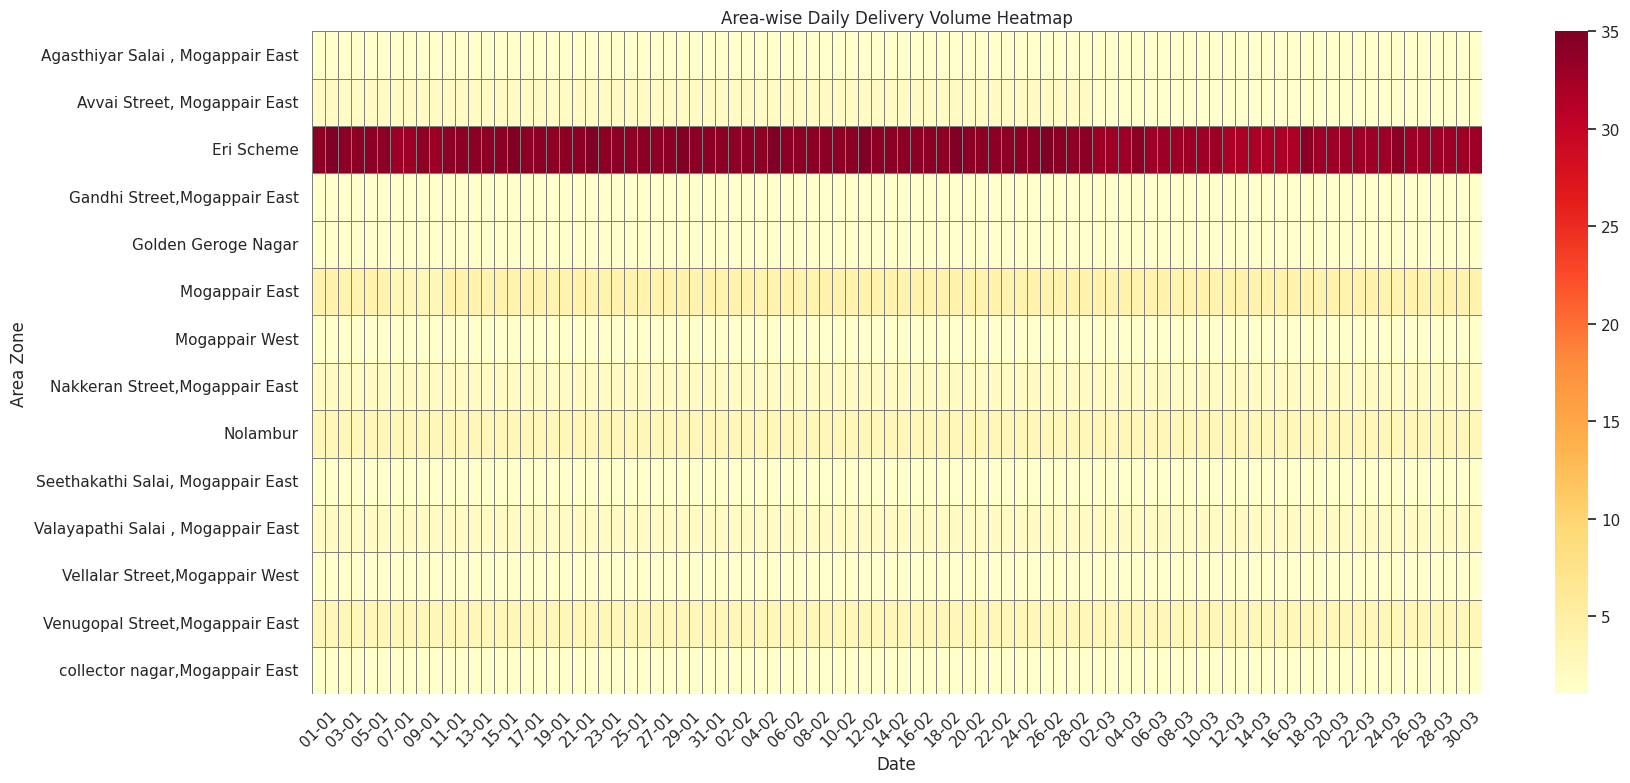

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Load Customer Master Data and Daily Delivery Log
#customer_df = pd.read_excel('/content/drive/MyDrive/IITM-BDMproject/Sheets.xlsx')
#delivery_df = pd.read_excel('/content/drive/MyDrive/IITM-BDMproject/Generated_Daily_Delivery_Template.xlsx')

# Convert date to datetime
delivery_df['Date'] = pd.to_datetime(delivery_df['Date'], dayfirst=True)

# Merge Delivery Log with Customer Master Data to get Area Zone info
merged_df = delivery_df.merge(customer_df[['Customer_ID', 'Area_Zone']], on='Customer_ID', how='left')

# Filter only successful deliveries
merged_df = merged_df[merged_df['Delivered?'] == 'Yes']

# Group by Date and Area_Zone to get daily delivery counts per area
area_daily_counts = merged_df.groupby(['Area_Zone', 'Date']).size().reset_index(name='Delivery_Count')

# Pivot DataFrame for Heatmap
heatmap_data = area_daily_counts.pivot(index='Area_Zone', columns='Date', values='Delivery_Count')

# Plot Heatmap
plt.figure(figsize=(18, 8))
sns.heatmap(heatmap_data, cmap="YlOrRd", annot=False, linewidths=0.5, linecolor='gray')

# Format X-axis to show dates only (dd-mm)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))

plt.title("Area-wise Daily Delivery Volume Heatmap")
plt.xlabel("Date")
plt.ylabel("Area Zone")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/tmp/ipython-input-3738443529.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  successful_deliveries['Day_of_Week'] = successful_deliveries['Date'].dt.day_name()
/tmp/ipython-input-3738443529.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Day_of_Week', y='Delivery_Count', data=daywise_counts, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette="coolwarm")


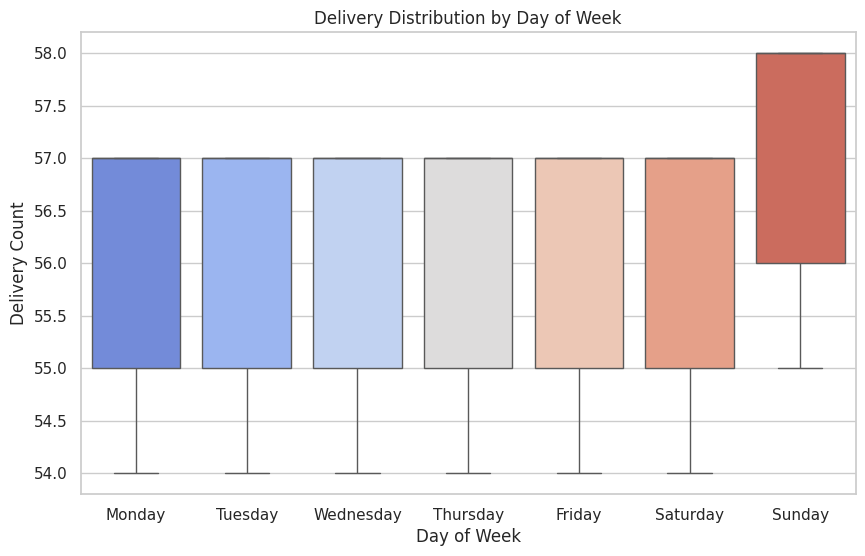

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming delivery_df is already loaded and Date column is datetime
# Filter only successful deliveries
successful_deliveries = delivery_df[delivery_df['Delivered?'] == 'Yes']

# Extract Day of the Week
successful_deliveries['Day_of_Week'] = successful_deliveries['Date'].dt.day_name()

# Group by Date and Day of Week to get delivery counts per day
daywise_counts = successful_deliveries.groupby(['Date', 'Day_of_Week']).size().reset_index(name='Delivery_Count')

# Plot Boxplot
plt.figure(figsize=(10,6))
sns.boxplot(x='Day_of_Week', y='Delivery_Count', data=daywise_counts, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette="coolwarm")
plt.title("Delivery Distribution by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Delivery Count")
plt.show()


CUSTOMER CHURN PREDICTION

In [ ]:
!pip install pandas matplotlib seaborn scikit-learn openpyxl


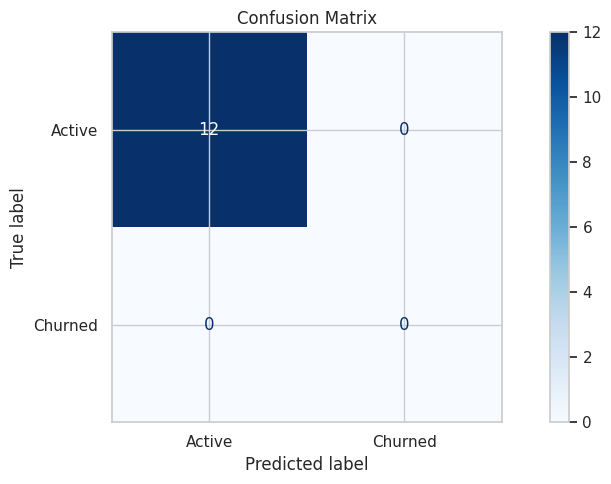

/tmp/ipython-input-669376137.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances.values, y=importances.index, palette="viridis")


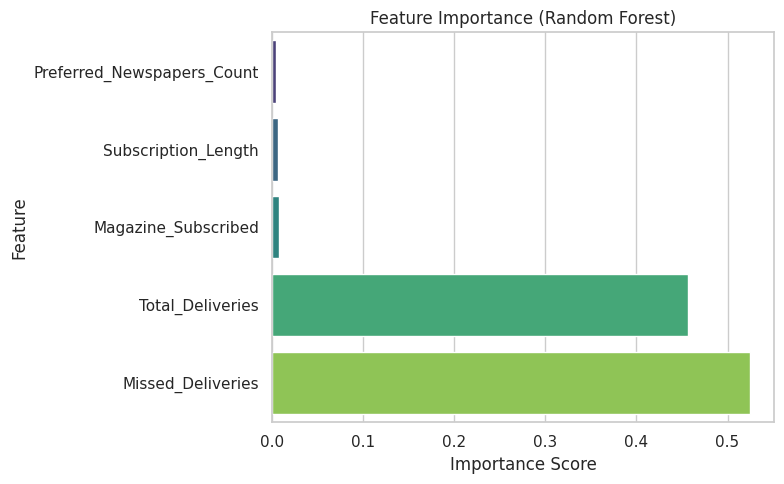

In [ ]:
# STEP 1: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import shap

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 5)

# STEP 2: Load data
base_path = "/content/drive/MyDrive/IITM-BDMproject/"
customer_df = pd.read_excel(base_path + "Sheets.xlsx")
delivery_df = pd.read_excel(base_path + "Daily_Delivery_Template.xlsx")
fuel_df = pd.read_excel(base_path + "Route_and_Fuel_Log_Template.xlsx")

# STEP 3: Churn Labeling
delivery_df['Date'] = pd.to_datetime(delivery_df['Date'], dayfirst=True, errors='coerce')
missed = delivery_df[delivery_df['Delivered?'] == 'No'].groupby('Customer_ID').size()
customer_df['Missed_Deliveries'] = customer_df['Customer_ID'].map(missed).fillna(0)
customer_df['Churn'] = customer_df.apply(lambda row: 1 if (str(row['Status']).lower() == 'inactive' or row['Missed_Deliveries'] > 5) else 0, axis=1)

# STEP 4: Feature Engineering
success = delivery_df[delivery_df['Delivered?'] == 'Yes'].groupby('Customer_ID').size()
customer_df['Total_Deliveries'] = customer_df['Customer_ID'].map(success).fillna(0)

customer_df['Start_Year'] = pd.to_datetime(customer_df['Start_Date'], errors='coerce').dt.year
customer_df['Subscription_Length'] = 2025 - customer_df['Start_Year'].fillna(2025)

customer_df['Preferred_Newspapers'] = customer_df['Preferred_Newspapers'].fillna('')
customer_df['Preferred_Newspapers_Count'] = customer_df['Preferred_Newspapers'].apply(lambda x: len(x.split(', ')) if x else 0)

customer_df['Magazine_Subscribed'] = customer_df['Magazines_Subscribed'].notnull().astype(int)

# STEP 5: Model Training
features = ['Total_Deliveries', 'Missed_Deliveries', 'Subscription_Length',
            'Preferred_Newspapers_Count', 'Magazine_Subscribed']
X = customer_df[features]
y = customer_df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# STEP 6: Confusion Matrix
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred, labels=[0,1])

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Active", "Churned"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

# STEP 7: Feature Importance Plot
importances = pd.Series(model.feature_importances_, index=features).sort_values(ascending=True)
plt.figure(figsize=(8, 5))
sns.barplot(x=importances.values, y=importances.index, palette="viridis")
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()




